# Guía Data Science

Durante esta actividad trabajaremos con los datos del sistema nacional de información municipal del gobierno de Chile y una planilla de datos preliminares del plebiscito 20201. Tienes acceso a dos fuentes de datos.

- Una base de datos en SQLite llamada ``municipios.db``, la que tiene información sobre el presupuesto municipal y la cantidad de personas de cada una de las comunas de Chile. Esos datos se almacenan en un esquema con tres tablas:

    - ``Comuna(id, nombre)``: que asigna a cada comuna en Chile un identificador.
    - ``Poblacion(cod, habitantes)``: que asigna a cada comuna la cantidad de habitantes. 
    - ``Presupuesto(id_comuna, municipio, plata)``: que contiene el presupuesto de dicha comuna.


- Una archivo csv llamado ``Resultados_Pleb.csv``, que contiene la votación agregada de cada comuna para el plebiscito de Octubre.

La idea de esta actividad es hacer un análisis de datos en torno a la siguiente problemática: **¿Cómo se relaciona el presupuesto de las comunas con su votación en el plebiscito?**



## Manejo de datos

Para esta actividad asumimos que ya sabes trabajar con SQLite y con la librería pandas de python. Para trabajar tus datos, necesitas tener todo en pandas (tanto la información de municipios.db como la de Resultados_Plev.csv).

Aquí tienes algunas opciones para trabajar tus datos: 

1. Cargar el csv directamente con pandas a una data frame y luego hacer consultas a la base de datos para hacer los dataframes del resto de la información.
2. Importar los datos del csv a la base de datos utilizando Python. Una forma de hacer esto es la propuesta en [el siguente link](https://stackoverflow.com/questions/2887878/importing-a-csv-file-into-a-sqlite3-database-table-using-python). Luego hacer los dataframes realizando consultas a la base de datos.
3. Importar los datos del csv a municipios.db directamente con SQLite3 (esta opción requiere que instales SQLite3 en tu computador. Luego hacer los dataframes realizando consultas a la base de datos.


**Importante:** Nunca grabes un .csv desde excel, porque excel puede cambiar la codificación de esos archivos. En caso de problemas, siempre puedes volver a bajar el .csv desde la página del curso.

In [4]:
!wget https://raw.githubusercontent.com/IIC2413/Syllabus-2021-1/main/Gu%C3%ADas/Gu%C3%ADa%207%20-%20Data_Science/Resultados_Pleb.csv
!wget https://github.com/IIC2413/Syllabus-2021-1/raw/main/Gu%C3%ADas/Gu%C3%ADa%207%20-%20Data_Science/municipios.db

--2021-06-16 22:28:16--  https://raw.githubusercontent.com/IIC2413/Syllabus-2021-1/main/Gu%C3%ADas/Gu%C3%ADa%207%20-%20Data_Science/Resultados_Pleb.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7787 (7.6K) [text/plain]
Saving to: ‘Resultados_Pleb.csv.1’

Resultados_Pleb.csv 100%[===================>]   7.60K  --.-KB/s    in 0s      

2021-06-16 22:28:16 (73.6 MB/s) - ‘Resultados_Pleb.csv.1’ saved [7787/7787]

--2021-06-16 22:28:17--  https://github.com/IIC2413/Syllabus-2021-1/raw/main/Gu%C3%ADas/Gu%C3%ADa%207%20-%20Data_Science/municipios.db
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/

In [5]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('municipios.db')
conn.text_factory = lambda x: str(x, 'latin1')
curr = conn.cursor()

In [6]:
# Utiliza estas celdas para crear los dataframes de pandas

In [7]:
# Comunas
curr.execute('''SELECT * from comuna''')
df_comuna = pd.DataFrame(curr.fetchall())
df_comuna.rename(columns = { 0: 'id', 1: 'nombre' }, inplace=True)
df_comuna

,id,nombre
0,1101,IQUIQUE
1,1107,ALTO HOSPICIO
2,1401,POZO ALMONTE
3,1402,CAMIÑA
4,1403,COLCHANE
...,...,...
340,16301,SAN CARLOS
341,16302,COIHUECO
342,16303,ÑIQUÉN
343,16304,SAN FABIÁN


In [8]:
# Población 
curr.execute('''SELECT * from poblacion''')
df_poblacion = pd.DataFrame(curr.fetchall())
df_poblacion.rename(columns = { 0: 'cod', 1: 'habitantes' }, inplace=True)
df_poblacion

,cod,habitantes
0,codigo,habitantes
1,15101,221364
2,15102,1255
3,15201,2765
4,15202,684
...,...,...
342,12301,6801
343,12302,1158
344,12303,405
345,12401,21477


In [9]:
df_poblacion.dtypes

cod           object
habitantes    object
dtype: object

In [10]:
# Necesitamos eliminar el primera fila que dice codigo y habitantes
df_poblacion = df_poblacion.drop(labels=0, axis=0)
# Necesitamos habitantes como número
df_poblacion['habitantes'] = df_poblacion['habitantes'].astype(float)
df_poblacion

,cod,habitantes
1,15101,221364.0
2,15102,1255.0
3,15201,2765.0
4,15202,684.0
5,1101,191468.0
...,...,...
342,12301,6801.0
343,12302,1158.0
344,12303,405.0
345,12401,21477.0


In [11]:
# Presupuesto
curr.execute('''SELECT * from presupuesto''')
df_presupuesto = pd.DataFrame(curr.fetchall())
df_presupuesto.rename(columns = { 0: 'id_comuna', 1: 'municipio', 2: 'plata' }, inplace=True)
df_presupuesto

,id_comuna,municipio,plata
0,1101,IQUIQUE,59072234
1,1107,ALTO HOSPICIO,13984404
2,1401,POZO ALMONTE,7613962
3,1402,CAMIÑA,1584008
4,1403,COLCHANE,2500000
...,...,...,...
333,16301,SAN CARLOS,10459701
334,16302,COIHUECO,5001190
335,16303,ÑIQUÉN,3386698
336,16304,SAN FABIÁN,1798500


In [12]:
#OPCIÓN 1 Plebiscito:
df_pleb = pd.read_csv('Resultados_Pleb.csv') 
df_pleb

,cod_com,Apruebo,Rechazo,Blancos,Nulos
0,1101,60976,18855,114,275
1,1107,21373,4608,46,102
2,1401,3730,1076,8,29
3,1402,293,207,2,11
4,1403,131,374,3,16
...,...,...,...,...,...
341,16301,12268,5729,42,89
342,16302,4420,2737,25,47
343,16303,2003,1228,10,17
344,16304,1364,516,7,12


In [13]:
#OPCIÓN 2 Plebiscito:
# curr.execute("CREATE TABLE pleb (cod_com int, Apruebo int, Rechazo int, Blancos int, Nulos int);") 
# with open('Resultados_Pleb.csv','r') as pleb_file:
#     dr = csv.DictReader(pleb_file) # comma is default delimiter
#     to_db = [(i['cod_com'], i['Apruebo'], i['Rechazo'], i['Blancos'], i['Nulos']) for i in dr]

# curr.executemany("INSERT INTO pleb (cod_com, Apruebo, Rechazo, Blancos, Nulos) VALUES (?, ?, ?, ?, ?);", to_db)
# conn.commit()

In [14]:
df_comuna.dtypes

id         int64
nombre    object
dtype: object

In [15]:
df_poblacion.dtypes

cod            object
habitantes    float64
dtype: object

In [16]:
df_presupuesto.dtypes

id_comuna     int64
municipio    object
plata         int64
dtype: object

In [17]:
df_pleb.dtypes

cod_com    int64
Apruebo    int64
Rechazo    int64
Blancos    int64
Nulos      int64
dtype: object

## Tareas a realizar

1. Puede ser que los datos estén sucios, pues son llenados por humanos. Para las siguientes tareas no debes tomar en cuenta datos nulos o que no han sido reportados (aunque eso signifique dejar fuera algunas comunas), así que tu primera misión es verificar que no hayan nulos en los dataframe y limpiarlos en caso de que hayan.

In [18]:
df_comuna[df_comuna.isnull().any(axis=1)]

,id,nombre


In [19]:
df_poblacion[df_poblacion.isnull().any(axis=1)]

,cod,habitantes


In [20]:
df_presupuesto[df_presupuesto.isnull().any(axis=1)]

,id_comuna,municipio,plata


In [21]:
df_pleb[df_pleb.isnull().any(axis=1)]

,cod_com,Apruebo,Rechazo,Blancos,Nulos


2. Crea un gráfico de puntos para visualizar la correlación entre el presupuesto de las comunas y la cantidad de habitantes de esa comuna.

In [22]:
# OPCIÓN 1 - Consulta JOIN
curr.execute('''SELECT presupuesto.id_comuna, presupuesto.municipio, poblacion.habitantes, presupuesto.plata
FROM presupuesto, poblacion WHERE presupuesto.id_comuna = poblacion.cod''')
habitantes_presupuesto = pd.DataFrame(curr.fetchall())
habitantes_presupuesto.rename(columns = { 0: 'id_comuna', 1: 'municipio', 2: 'habitantes', 3: 'presupuesto' }, inplace=True)
habitantes_presupuesto

,id_comuna,municipio,habitantes,presupuesto
0,1101,IQUIQUE,191468,59072234
1,1107,ALTO HOSPICIO,108375,13984404
2,1401,POZO ALMONTE,15711,7613962
3,1402,CAMIÑA,1250,1584008
4,1403,COLCHANE,1728,2500000
...,...,...,...,...
312,14204,RÍO BUENO,31372,5771272
313,15101,ARICA,221364,37808221
314,15102,CAMARONES,1255,2478356
315,15201,PUTRE,2765,2664568


In [23]:
# OPCIÓN 2 - MERGE de Pandas
habitantes_presupuesto = df_presupuesto.merge(df_poblacion, left_on='id_comuna', right_on='cod')
habitantes_presupuesto

,id_comuna,municipio,plata,cod,habitantes
0,1101,IQUIQUE,59072234,1101,191468.0
1,1107,ALTO HOSPICIO,13984404,1107,108375.0
2,1401,POZO ALMONTE,7613962,1401,15711.0
3,1402,CAMIÑA,1584008,1402,1250.0
4,1403,COLCHANE,2500000,1403,1728.0
...,...,...,...,...,...
312,14204,RÍO BUENO,5771272,14204,31372.0
313,15101,ARICA,37808221,15101,221364.0
314,15102,CAMARONES,2478356,15102,1255.0
315,15201,PUTRE,2664568,15201,2765.0


In [24]:
#Correlation
habitantes_presupuesto.corr()

,plata,habitantes
plata,1.000000,0.772068
habitantes,0.772068,1.000000


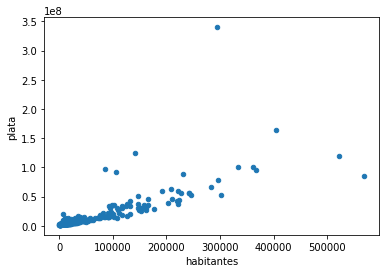

In [25]:
#Plot
habitantes_presupuesto.plot.scatter(x='habitantes', y='plata')

3. Observa que la correlación es ligeramente positiva (como es de esperar). Sin embargo, hay un outlier cuyo presupuesto se escapa. ¿Puedes ver qué comuna es?

In [26]:
#A partir del gráfico se obtiene que el outlier es el que tiene el máximo presupuesto, por lo que se busca:
habitantes_presupuesto["plata"].idxmax()

263

In [27]:
habitantes_presupuesto.iloc[263]

id_comuna          13114
municipio     LAS CONDES
plata          339980450
cod                13114
habitantes        294838
Name: 263, dtype: object

In [28]:
# Otra opción para encontrar la comuna:
habitantes_presupuesto[habitantes_presupuesto['plata'] > 300000000]

,id_comuna,municipio,plata,cod,habitantes
263,13114,LAS CONDES,339980450,13114,294838.0


4. Ahora vamos a refinar un poco la tabla comunas que vamos a utilizar, descartando ciertos outliers. Crea un dataframe llamado  ``comuna_limpia`` que contenga todas las comunas, excepto (i) el outlier que identificaste en el apartado anterior y (ii) todas las comunas que tengan 5000 habitantes o menos. Esta vista debería tener 286 comunas.

In [29]:
#Opción con pandas
comuna_limpia = df_comuna[df_comuna['nombre'] != 'LAS CONDES'].merge(df_poblacion[df_poblacion['habitantes'] > 5000], left_on='id', right_on='cod')
comuna_limpia

,id,nombre,cod,habitantes
0,1101,IQUIQUE,1101,191468.0
1,1107,ALTO HOSPICIO,1107,108375.0
2,1401,POZO ALMONTE,1401,15711.0
3,1405,PICA,1405,9296.0
4,2101,ANTOFAGASTA,2101,361873.0
...,...,...,...,...
281,14201,LA UNIÓN,14201,38036.0
282,14202,FUTRONO,14202,14665.0
283,14203,LAGO RANCO,14203,9896.0
284,14204,RÍO BUENO,14204,31372.0


In [30]:
#Opción en sql
# curr.execute('''CREATE TABLE ComunaLimpia AS
# SELECT COMUNA.id AS id, COMUNA.nombre as nombre
# FROM COMUNA JOIN poblacion ON COMUNA.id = poblacion.cod
# WHERE COMUNA.id != 13114
# AND poblacion.habitantes > 5000''')

#Pasarlo a dataframe con pandas read_sql_query
#comuna_limpia = pd.read_sql_query("SELECT * FROM ComunaLimpia", conn)

#Pasarlo a dataframe haciendo fetch
# curr.execute('''SELECT * FROM ComunaLimpia''')
# df_comuna = pd.DataFrame(curr.fetchall())

5. Crea un gráfico de puntos para visualizar la correlación entre el presupuesto de las comunas y el porcentaje de votos apruebo (sobre el total de votos) en esas comunas. Anota el coeficiente de correlación. ¿Puedes inferir algo?

In [31]:
pres_pleb = df_presupuesto.merge(df_pleb, left_on='id_comuna', right_on='cod_com')
pres_pleb

,id_comuna,municipio,plata,cod_com,Apruebo,Rechazo,Blancos,Nulos
0,1101,IQUIQUE,59072234,1101,60976,18855,114,275
1,1107,ALTO HOSPICIO,13984404,1107,21373,4608,46,102
2,1401,POZO ALMONTE,7613962,1401,3730,1076,8,29
3,1402,CAMIÑA,1584008,1402,293,207,2,11
4,1403,COLCHANE,2500000,1403,131,374,3,16
...,...,...,...,...,...,...,...,...
333,16301,SAN CARLOS,10459701,16301,12268,5729,42,89
334,16302,COIHUECO,5001190,16302,4420,2737,25,47
335,16303,ÑIQUÉN,3386698,16303,2003,1228,10,17
336,16304,SAN FABIÁN,1798500,16304,1364,516,7,12


In [32]:
#Calculamos el porcentaje de aprobación
# total_votos = pres_pleb['Apruebo'] + pres_pleb['Rechazo'] + pres_pleb['Nulos'] + pres_pleb['Blancos']
# porcentaje = pres_pleb['Apruebo']/total_votos

# presupuesto_aprobacion = pres_pleb[['plata']]
# presupuesto_aprobacion['aprobacion'] = porcentaje

#Solución más elegante
#https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
pres_pleb["porcentaje_aprob"] = pres_pleb.apply(lambda row: (row.Apruebo)/(row.Apruebo + row.Rechazo + row.Blancos + row.Nulos), axis=1)
pres_pleb = pres_pleb[['id_comuna', 'plata', 'porcentaje_aprob']]
pres_pleb

,id_comuna,plata,porcentaje_aprob
0,1101,59072234,0.760110
1,1107,13984404,0.817980
2,1401,7613962,0.770184
3,1402,1584008,0.571150
4,1403,2500000,0.250000
...,...,...,...
333,16301,10459701,0.676743
334,16302,5001190,0.611426
335,16303,3386698,0.614794
336,16304,1798500,0.718273


In [33]:
pres_pleb.corr()

,id_comuna,plata,porcentaje_aprob
id_comuna,1.000000,0.129685,-0.229909
plata,0.129685,1.000000,-0.070008
porcentaje_aprob,-0.229909,-0.070008,1.000000


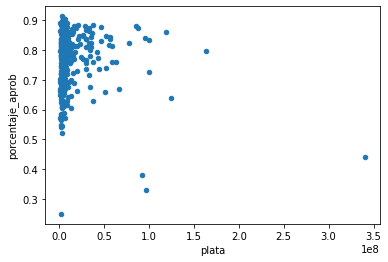

In [34]:
#Plot
pres_pleb.plot.scatter(x='plata', y='porcentaje_aprob')

6. Ahora visualiza el mismo gráfico, pero utilizando solo aquellas comunas que estén en la vista ``ComunaLimpia``. Vuelve a anotar el coeficiente de correlación.

In [35]:
pres_pleb_limpias = pres_pleb.merge(comuna_limpia, left_on='id_comuna', right_on='cod')[['plata', 'porcentaje_aprob']]
pres_pleb_limpias

,plata,porcentaje_aprob
0,59072234,0.760110
1,13984404,0.817980
2,7613962,0.770184
3,5887820,0.726489
4,100635302,0.832786
...,...,...
276,6839300,0.721004
277,3486415,0.606443
278,3135370,0.625149
279,5771272,0.681408


In [36]:
pres_pleb_limpias.corr()

,plata,porcentaje_aprob
plata,1.000000,0.013928
porcentaje_aprob,0.013928,1.000000


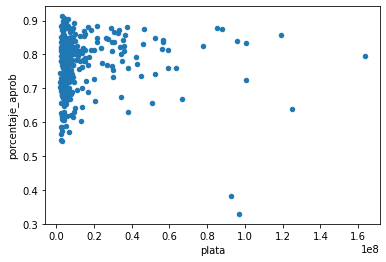

In [37]:
#Plot
pres_pleb_limpias.plot.scatter(x='plata', y='porcentaje_aprob')

7. ¿Cómo cambia la correlación? ¿Por qué crees que pasó eso?

Hay un ligero aumento de la correlación que se debe a la eliminación de las comunas outliers.